In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import math
from itertools import combinations

In [2]:
def spinless_sub_dim(N,r) : 
    '''
    input : number of lattice sites (N), number of electrons (r) 
    output : dimension of this subspace 
    '''
    return math.comb(N,r)

def spinless_basis(N,r) : 
    basis_set = []
    lattice = list(range(N))
    places = list(combinations(lattice, r))
    for combination in places : 
        basis = [False] *N
        for index in combination : 
            basis[index] = True 
        basis_set.append(basis)
    return basis_set

def tb0_model(N,r,e,t): 
    ''' Generalised Tight Binding (spinless) model for periodic boundary condition
    Input : Number of lattice sites (int), number of electrons(int), hopping constant (int/float), onsite energies (list)
    Output : Tight binding Hamiltonian, eigenvalues and eigenvectors of the matrix ''' 
    dim = spinless_sub_dim(N,r)
    if r==0 : 
        H = np.zeros(1)
        eigval = H[0]
        new_vec = H
    elif r==N : 
        H = [[r]]
        eigval = H[0]
        new_vec = H
    else : 
        H = np.zeros((dim, dim))
        basis_set = spinless_basis(N,r)
        n_diag = np.zeros(dim)
        for i in range(dim) : 
            for j in range(N) : 
                n_diag[i] += e[j]*basis_set[i][j]

        np.fill_diagonal(H,n_diag)
        for basis_index,basis in enumerate(basis_set) : 
            for site in range(len(basis)) : 
                if basis[site] == False and basis[(site+1)%N] == True : 
                    new_state = basis.copy()
                    new_state[site] = True
                    new_state[(site+1)%N] = False 
                    for i in range(len(basis_set)) : 
                        if basis_set[i] == new_state: 
                            f_index = i
                    H[f_index][basis_index] +=t
                if N != 2 : 
                    if basis[site] == True and basis[(site+1)%N] == False : 
                        new_state = basis.copy()
                        new_state[site] = False
                        new_state[(site+1)%N] = True 
                        for i in range(len(basis_set)) : 
                            if basis_set[i] == new_state : 
                                f_index = i
                        H[f_index][basis_index] +=t 
        eigval,eigvec = np.linalg.eigh(H)
        new_vec = list(zip(*eigvec))
                
    return H,eigval,new_vec

In [3]:
def eigs_list(t) : 
    elist = []
    for N in range(2,9) : 
        e=[1]*N
        for r in range(1,N) : 
            H,eig,vec = tb0_model(N,r,e,t)
            elist.append(min(eig))
    return elist

def only_min_eig(N_list,t) : 
    elist = []
    for N in N_list : 
        e = [1]*N
        r=N//2
        H,eig,vec = tb0_model(N,r,e,t)
        elist.append(min(eig))
    return elist 

In [4]:
dicke_t1_path = "t1HamResults/Dicke Data.csv"
df1 = pd.read_csv(dicke_t1_path)

dicke_t7_path = "t7HamResults/Dicke Data.csv"
df7 = pd.read_csv(dicke_t7_path)


In [5]:
'''t=1'''
N_t1 = df1['N']
eig_t1 = df1['exact eig']
est_eig_t1 = df1['est_eig']


eigstate_acc_t1 = df1['Eigstate accuracy']
state_acc_t1 = [complex(num).real for num in eigstate_acc_t1]
run_time_t1 = df1['time']

'''t=7'''
N_t7 = df7['N']
eig_t7 = df7['exact eig']
est_eig_t7 = df7['est_eig']

eigstate_acc_t7 = df7['Eigstate accuracy']
state_acc_t7 = [complex(num).real for num in eigstate_acc_t7]
run_time_t7 = df7['time']


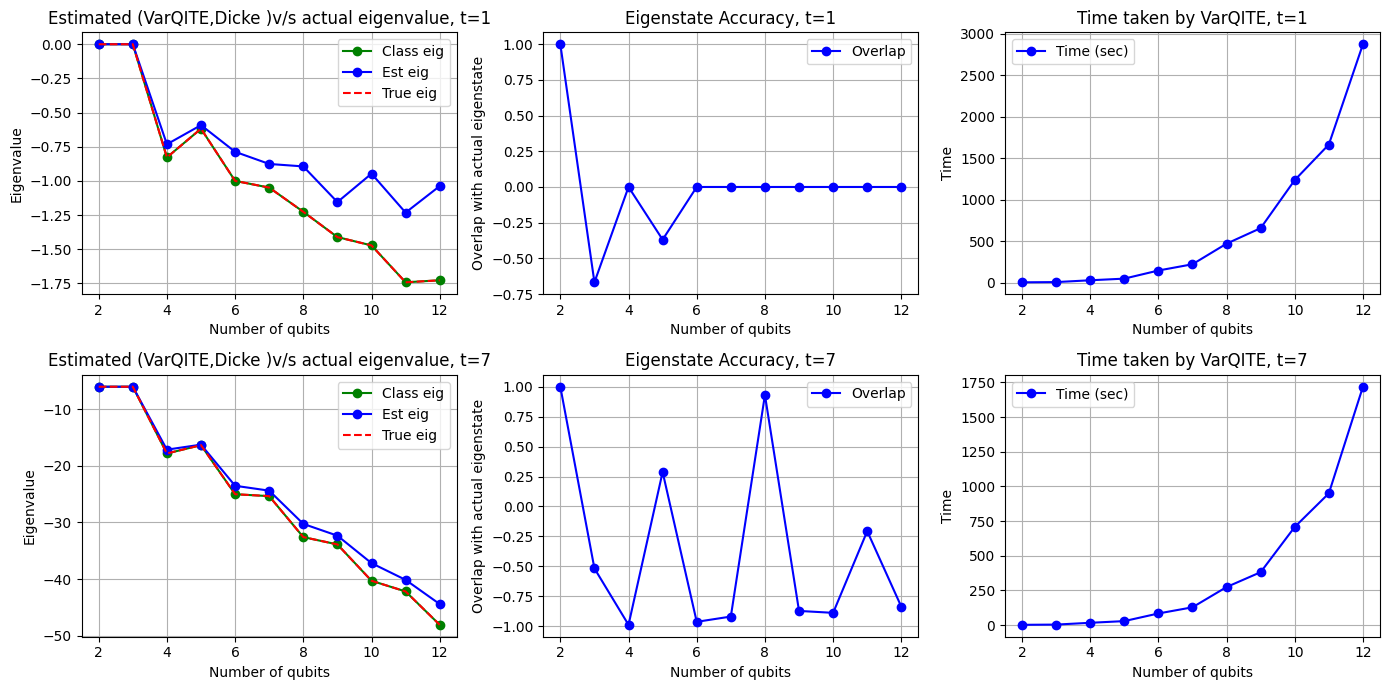

In [6]:
# Create a figure and three subplots (1 row, 3 columns)
fig, axs = plt.subplots(2, 3, figsize=(14, 7))

# Plotting the first graph in the first subplot
axs[0,0].plot(N_t1, eig_t1, label='Class eig', color='green', marker='o')
axs[0,0].plot(N_t1, est_eig_t1, label='Est eig', color='blue', marker='o')
axs[0,0].plot(N_t1, only_min_eig(N_t1,1), label='True eig', color='red', linestyle='--')
axs[0,0].set_xlabel('Number of qubits')
axs[0,0].set_ylabel('Eigenvalue')
axs[0,0].set_title('Estimated (VarQITE,Dicke )v/s actual eigenvalue, t=1')
axs[0,0].grid(True)
axs[0,0].legend()

# Plotting the second graph in the second subplot
axs[0,1].plot(N_t1, state_acc_t1, label='Overlap', color='blue', marker='o')
axs[0,1].set_xlabel('Number of qubits')
axs[0,1].set_ylabel('Overlap with actual eigenstate')
axs[0,1].set_title('Eigenstate Accuracy, t=1')
axs[0,1].grid(True)
axs[0,1].legend()

# Plotting the third graph in the third subplot
axs[0,2].plot(N_t1, run_time_t1, label='Time (sec)', color='blue', marker='o')
axs[0,2].set_xlabel('Number of qubits')
axs[0,2].set_ylabel('Time')
axs[0,2].set_title('Time taken by VarQITE, t=1')
axs[0,2].grid(True)
axs[0,2].legend()

# Plotting the first graph in the first subplot
axs[1,0].plot(N_t7, eig_t7, label='Class eig', color='green', marker='o')
axs[1,0].plot(N_t7, est_eig_t7, label='Est eig', color='blue', marker='o')
axs[1,0].plot(N_t1, only_min_eig(N_t7,7), label='True eig', color='red', linestyle='--')
axs[1,0].set_xlabel('Number of qubits')
axs[1,0].set_ylabel('Eigenvalue')
axs[1,0].set_title('Estimated (VarQITE,Dicke )v/s actual eigenvalue, t=7')
axs[1,0].grid(True)
axs[1,0].legend()

# Plotting the second graph in the second subplot
axs[1,1].plot(N_t7, state_acc_t7, label='Overlap', color='blue', marker='o')
axs[1,1].set_xlabel('Number of qubits')
axs[1,1].set_ylabel('Overlap with actual eigenstate')
axs[1,1].set_title('Eigenstate Accuracy, t=7')
axs[1,1].grid(True)
axs[1,1].legend()

# Plotting the third graph in the third subplot
axs[1,2].plot(N_t7, run_time_t7, label='Time (sec)', color='blue', marker='o')
axs[1,2].set_xlabel('Number of qubits')
axs[1,2].set_ylabel('Time')
axs[1,2].set_title('Time taken by VarQITE, t=7')
axs[1,2].grid(True)
axs[1,2].legend()

# Adjust layout to prevent overlapping of titles and labels
plt.tight_layout()

# Show the plots
plt.show()


In [7]:
sub_t1_path = "t1HamResults/All occ data.csv"
sub_df1 = pd.read_csv(sub_t1_path)

sub_t7_path = "t7HamResults/All occ data.csv"
sub_df7 = pd.read_csv(sub_t7_path)


In [8]:
'''t=1'''
comb_t1 = []
var = 0
for num in sub_df1['N'].unique() : 
    sub_list = [f'{num}C{i}' for i in range(1,num)]
    comb_t1 += sub_list
sub_eig_t1 = sub_df1['exact eig']
sub_est_eig_t1 = sub_df1['est_eig']
sub_run_time_t1 = sub_df1['time']

'''t=7'''
comb_t7 = []
for num in sub_df7['N'].unique() : 
    sub_list = [f'{num}C{i}' for i in range(1,num)]
    comb_t7 += sub_list
sub_eig_t7 = sub_df7['exact eig']
sub_est_eig_t7 = sub_df7['est_eig']
sub_run_time_t7 = sub_df7['time']


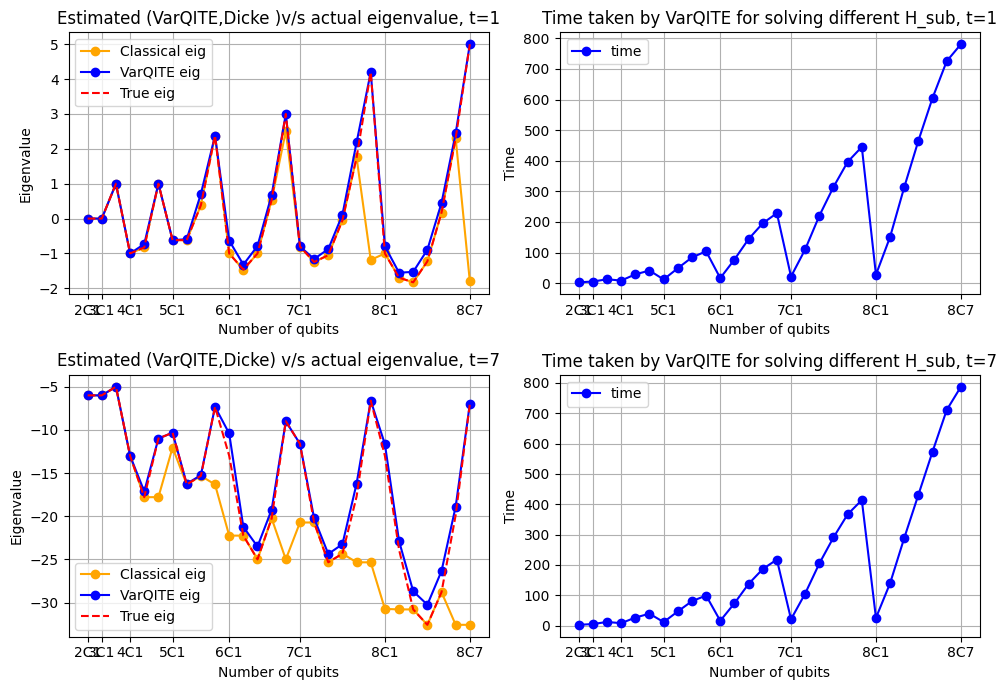

In [9]:
fig, axs = plt.subplots(2, 2, figsize=(10, 7))

xticks = [0,1,3,6,10,15,21,27]
xtick_labels = [comb_t1[i] for i in xticks]
# Plotting the first graph in the first subplot
axs[0,0].plot(comb_t1, sub_eig_t1, label='Classical eig', color='orange', marker='o')
axs[0,0].plot(comb_t1, sub_est_eig_t1, label='VarQITE eig', color='blue',marker='o')
axs[0,0].plot(comb_t1, eigs_list(1), label='True eig', color='red',linestyle='--')
axs[0,0].plot
axs[0,0].set_xlabel('Number of qubits')
axs[0,0].set_ylabel('Eigenvalue')
axs[0,0].set_title('Estimated (VarQITE,Dicke )v/s actual eigenvalue, t=1')
axs[0,0].grid(True)
axs[0,0].set_xticks(xticks)
axs[0,0].set_xticklabels(xtick_labels)
axs[0,0].legend()

# Plotting the second graph in the second subplot
axs[0,1].plot(comb_t1, sub_run_time_t1, label='time', color='blue', marker='o')
axs[0,1].set_xlabel('Number of qubits')
axs[0,1].set_ylabel('Time')
axs[0,1].set_title('Time taken by VarQITE for solving different H_sub, t=1')
axs[0,1].grid(True)
axs[0,1].set_xticks(xticks)
axs[0,1].set_xticklabels(xtick_labels)
axs[0,1].legend()

# Plotting the first graph in the first subplot
axs[1,0].plot(comb_t7, sub_eig_t7, label='Classical eig', color='orange', marker='o')
axs[1,0].plot(comb_t7, sub_est_eig_t7, label='VarQITE eig', color='blue', marker='o')
axs[1,0].plot(comb_t1, eigs_list(7), label='True eig', color='red',linestyle='--')
axs[1,0].set_xlabel('Number of qubits')
axs[1,0].set_ylabel('Eigenvalue')
axs[1,0].set_title('Estimated (VarQITE,Dicke) v/s actual eigenvalue, t=7')
axs[1,0].grid(True)
axs[1,0].set_xticks(xticks)
axs[1,0].set_xticklabels(xtick_labels)
axs[1,0].legend()

# Plotting the second graph in the second subplot
axs[1,1].plot(comb_t7, sub_run_time_t7, label='time', color='blue', marker='o')
axs[1,1].set_xlabel('Number of qubits')
axs[1,1].set_ylabel('Time')
axs[1,1].set_title('Time taken by VarQITE for solving different H_sub, t=7')
axs[1,1].grid(True)
axs[1,1].set_xticks(xticks)
axs[1,1].set_xticklabels(xtick_labels)
axs[1,1].legend()

plt.tight_layout()
plt.show()

In [10]:
comp_df = pd.read_csv("t1HamResults/su2vsDicke data.csv")
su2 = comp_df[comp_df['Ansatz'] == 'su2']
su2 = su2.reset_index(drop=True)

dicke = comp_df[comp_df['Ansatz'] == 'dicke']
dicke = dicke.reset_index(drop=True)

In [11]:
print(dicke)

  Ansatz   N  error  TrueEig  est_eig     time StateAccuracy  ClsclEig
0  dicke   3  0.000   -0.000    0.000    3.919   (-0.651+0j)     0.000
1  dicke   4  0.268   -1.000   -0.732   21.246            0j    -0.828
2  dicke   6  0.677   -1.464   -0.787  114.500            0j    -1.000
3  dicke   7  0.357   -1.247   -0.890  175.561       (-0-0j)    -1.049
4  dicke   9  0.604   -1.759   -1.155  517.672            0j    -1.411
5  dicke  10  1.291   -2.236   -0.945  983.109            0j    -1.472


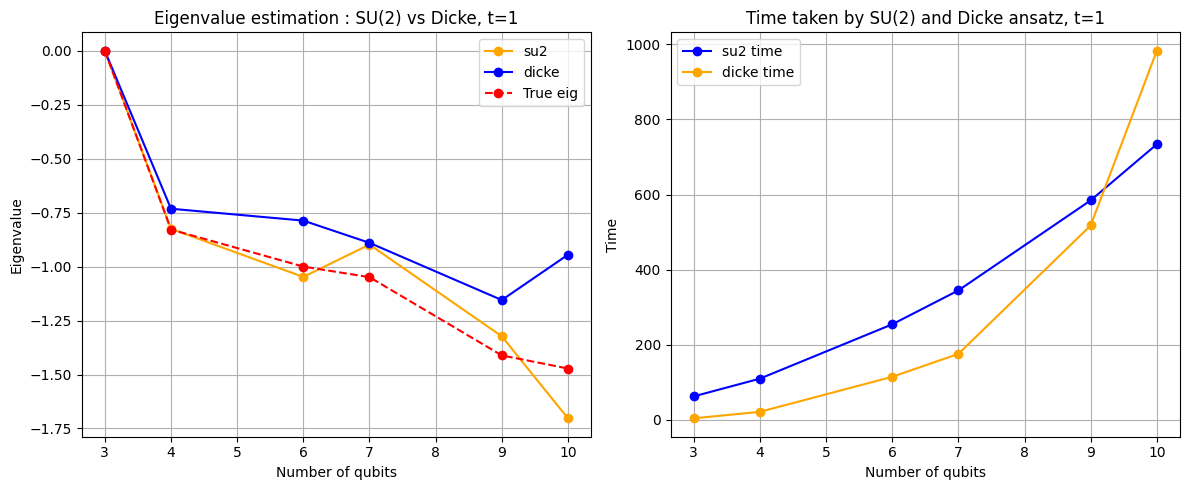

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

#xticks = su2['N']

# Plotting the first graph in the first subplot
axs[0].plot(su2['N'], su2['est_eig'], label='su2', color='orange', marker='o')
axs[0].plot(su2['N'], dicke['est_eig'], label='dicke', color='blue',marker='o')
axs[0].plot(su2['N'], only_min_eig(su2['N'],1), label='True eig', color='red',linestyle='--',marker='o')
axs[0].plot
axs[0].set_xlabel('Number of qubits')
axs[0].set_ylabel('Eigenvalue')
axs[0].set_title('Eigenvalue estimation : SU(2) vs Dicke, t=1')
axs[0].grid(True)
# axs[0,0].set_xticks(xticks)
# axs[0,0].set_xticklabels(xtick_labels)
axs[0].legend()

# Plotting the second graph in the second subplot
axs[1].plot(su2['N'], su2['time'], label='su2 time', color='blue', marker='o')
axs[1].plot(su2['N'], dicke['time'], label='dicke time', color='orange', marker='o')
axs[1].set_xlabel('Number of qubits')
axs[1].set_ylabel('Time')
axs[1].set_title('Time taken by SU(2) and Dicke ansatz, t=1')
axs[1].grid(True)
# axs[0,1].set_xticks(xticks)
# axs[0,1].set_xticklabels(xtick_labels)
axs[1].legend()

plt.tight_layout()
plt.show()